# PERCEPTRON

In [1]:
# Importing neccessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Predict Function
''' Arguments : Weights id 2D vector (1,number of features + 1) --- +1 indicate bias             
                Input is 1D vector (number_of_features,) 
'''
def predict(Weights, Input):
    # Solving the equation W0 + W1*X1 +W2*X2...number of features
    sum = np.dot(Input, Weights[0,1:]) + Weights[0,0]
    # Checking the threshold
    if sum > 0:
        ans = 1
    else:
        ans = 0            
    return ans   

In [3]:
# Activation function (signum)
# Argument : z is numeric value which is compared with zero
def signum(z):
    if z < 0:
        return 0
    else:
        return 1

In [4]:
# Preceptron Training Function
''' Arguments : Input is 2D vector (m,n) where m is number of training example and n is number of features
                Label is 1D vector (m,)
                lr is Learning rate which is initialised with 0.1
'''
def Perceptron_Train(Input, Label, lr = 0.1):
    m,n = Input.shape
    # concatenating 1 to features vector for learning bias
    Input = np.hstack((np.ones((m, 1)),Input))
    # Initializing Weights with random value of shape (1,n+1) ..+1 is for bias
    W = np.random.rand(n+1).reshape((1,n+1))
    # Running the loop till we find all correctly classified data 
    # we can add Fix number of Iteration also 
    # flag to indentify whether all example are classified correctly or not
    # flag = true implies atleast one is there which is misclassified
    # flag = false implies all are correctly classified
    flag = True
    while flag:
        flag = False   
        # Traversing the Feature vector
        for index, x in enumerate(Input):
            # If it is misclassified then Update the weights accordingly
            if signum( np.dot( x , W.T ) ) != Label[index]: 
                flag = True
                if( Label[index] == 1 ):
                    W = W + lr * x  # Added because model is interprating as 0 But Actually it is 1 so to compensate that
                else:
                    W = W - lr * x  # Subtracted because model is interprating as 1 But Actually it is 0 
    return W

# For 'OR' input dataset

In [5]:
# Preparing input and target for OR
X = [[0,0],[0,1],[1,0],[1,1]]
Y = [0,1,1,1]
# Converting into numpy array
Input = np.array(X)
Label = np.array(Y)

In [6]:
# Training perceptron with OR dataset

W = Perceptron_Train( Input , Label )
print("Weights For OR as a dataset:- ")
print(W)

Weights For OR as a dataset:- 
[[-0.02216132  0.35995654  0.3020248 ]]


In [7]:
# Checking for OR inputs
print("********************** OR ***********************")
print("x1 x2  Output")
inputs = np.array([0, 0])
res = predict(W,inputs)
print("0  0   {}".format(res))

inputs = np.array([1, 0])
res = predict(W,inputs)
print("1  0   {}".format(res))

inputs = np.array([0, 1])
res = predict(W,inputs)
print("0  1   {}".format(res))

inputs = np.array([1, 1])
res = predict(W,inputs)
print("1  1   {}".format(res))

********************** OR ***********************
x1 x2  Output
0  0   0
1  0   1
0  1   1
1  1   1


# For 'AND' input dataset

In [8]:
# Preparing input and target for AND
X = [[0,0],[0,1],[1,0],[1,1]]
Y = [0,0,0,1]
# Converting into numpy array
Input = np.array(X)
Label = np.array(Y)

In [9]:
# Training perceptron with AND dataset
W = Perceptron_Train( Input,Label )
print("Weights For AND as a dataset:- ")
print(W)

Weights For AND as a dataset:- 
[[-0.42146788  0.23985015  0.24704417]]


In [10]:
# Checking for AND inputs
print("********************** AND ***********************")

print("x1 x2  Output")
inputs = np.array([0, 0])
res = predict(W,inputs)
print("0  0   {}".format(res))

inputs = np.array([1, 0])
res = predict(W,inputs)
print("1  0   {}".format(res))

inputs = np.array([0, 1])
res = predict(W,inputs)
print("0  1   {}".format(res))

inputs = np.array([1, 1])
res = predict(W,inputs)
print("1  1   {}".format(res))

********************** AND ***********************
x1 x2  Output
0  0   0
1  0   0
0  1   0
1  1   1


# On Iris Dataset (Taking Sepal Length and Sepal Width as its feature and target setosa and versicolor)

In [11]:
# Taking dataset from sklearn library
from sklearn import datasets
data = datasets.load_iris() # Data has four features and 150 training examples and 3 classes each has 50 example
X = data.data[0:100,0:2]    # Taking 100 example of two classes and two features
Y = data.target[0:100]

In [12]:
# Shuffling the dataset
m,n = X.shape
l = [i for  i in range(0, m)]
# Shuffling the Indexes
np.random.shuffle(l)
# Shuffling the Dataset according to Shuffled indexes
X = X[l]
Y = Y[l]
partition = (int)( 0.7 * m)  # Partition index for dividing into training and testing dataset
# Partitioning
X_train = X[0:partition]
Y_train = Y[0:partition]
X_test  = X[partition:m]
Y_test  = Y[partition:m]

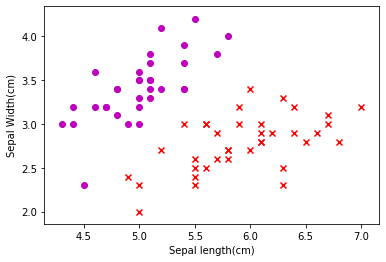

In [13]:
# Plotting the data to visualize
plt.figure()
for index in range(partition):
    if Y_train[index] == 0:
        plt.scatter(X_train[index,0], X_train[index,1], c = 'm', marker = 'o')
    else:
        plt.scatter(X_train[index,0], X_train[index,1], c = 'r', marker = 'x')

plt.xlabel("Sepal length(cm)")
plt.ylabel("Sepal Width(cm)")
plt.show()

In [14]:
# Training perceptron tp classify Setosa and versicolor
W = Perceptron_Train(X_train,Y_train)
print("Weights For Iris dataset:- ")
print(W)

Weights For Iris dataset:- 
[[-11.8675675    7.41962208  -9.39853843]]


In [15]:
# Checking the accuracy for remaining test dataset
y_pred = []
m,n = X_test.shape
for i in range(m):
    y_pred.append(predict(W,X_test[i]))
Diff = y_pred - Y_test
c = Diff[Diff == 0]
print("Accuracy : {}".format((float)(len(c)/m)))

Accuracy : 1.0
